# Explore BirdNET logs

In [23]:
import json
from pathlib import Path
from glob import glob
from tqdm import tqdm
import pandas
from datetime import datetime
import dateutil.parser
import calplot

In [2]:
log_paths = glob("logs/*", recursive=True)
print("log_paths:", len(log_paths))

log_paths: 232


In [3]:
log = []
for log_path in tqdm(log_paths):
    try:
        lines = open(log_path).readlines()
        log += [json.loads(line) for line in lines]
    except:
        print("failed:", log_path)

print("log:", len(log), log[0])

100%|██████████| 232/232 [00:31<00:00,  7.43it/s]

log: 3829641 {'msg': 'success', 'results': [['Turdus merula_Eurasian Blackbird', 0.0501], ['Pandion haliaetus_Osprey', 0.0443], ['Fulica atra_Eurasian Coot', 0.0429]], 'filename': '20230505T235955+1000', 'skipped': 0, 'oldest': '20230505T235955+1000', 'timestamp': '2023-05-05T23:59:55+10:00', 'hour_of_day': '23'}


In [4]:
# Convert to df
raw = pandas.DataFrame.from_records(log)
raw['timestamp'] = pandas.to_datetime(raw['timestamp'])

In [5]:
# Cleanup
raw = raw[df['msg'] == 'success'].copy()
raw = raw.explode(['results'])

In [6]:
raw[['name','confidence']] = pandas.DataFrame(raw.results.tolist(), index=raw.index)
raw[['species', 'common']] = raw['name'].str.split("_", expand = True)
raw.drop(columns=['msg', 'results', 'filename', 'oldest', 'name'], inplace=True)
raw

,skipped,timestamp,hour_of_day,confidence,species,common
0,0,2023-05-05 23:59:55+10:00,23,0.0501,Turdus merula,Eurasian Blackbird
0,0,2023-05-05 23:59:55+10:00,23,0.0443,Pandion haliaetus,Osprey
0,0,2023-05-05 23:59:55+10:00,23,0.0429,Fulica atra,Eurasian Coot
1,0,2023-05-06 00:00:00+10:00,00,0.0532,Turdus merula,Eurasian Blackbird
1,0,2023-05-06 00:00:00+10:00,00,0.0520,Pandion haliaetus,Osprey
...,...,...,...,...,...,...
3829639,0,2022-12-31 23:59:39+10:00,23,0.0456,Falco peregrinus,Peregrine Falcon
3829639,0,2022-12-31 23:59:39+10:00,23,0.0365,Tyto alba,Barn Owl
3829640,0,2022-12-31 23:59:44+10:00,23,0.0519,Turdus merula,Eurasian Blackbird
3829640,0,2022-12-31 23:59:44+10:00,23,0.0480,Pandion haliaetus,Osprey


<Axes: ylabel='common'>

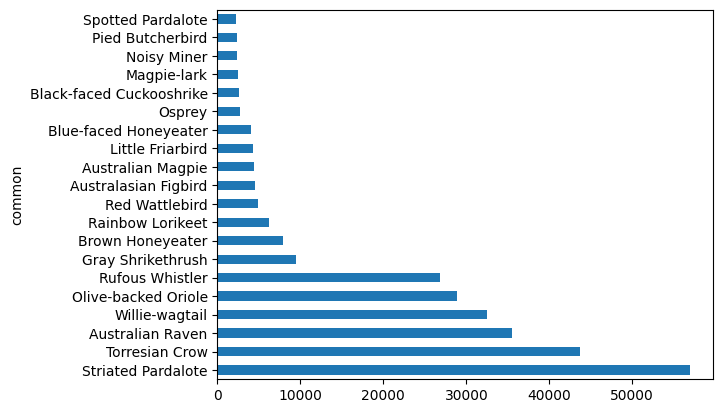

In [18]:
df = raw.query('confidence > 0.3')

# Plot top species
df.common.value_counts().nlargest(20).plot(kind='barh')

In [20]:
df

,skipped,timestamp,hour_of_day,confidence,species,common
4130,0,2023-05-06 05:44:15+10:00,05,0.4268,Cracticus torquatus,Gray Butcherbird
4131,0,2023-05-06 05:44:20+10:00,05,0.4531,Cracticus torquatus,Gray Butcherbird
4213,0,2023-05-06 05:51:11+10:00,05,0.8287,Rhipidura leucophrys,Willie-wagtail
4214,0,2023-05-06 05:51:16+10:00,05,0.7083,Rhipidura leucophrys,Willie-wagtail
4216,0,2023-05-06 05:51:26+10:00,05,0.7362,Rhipidura leucophrys,Willie-wagtail
...,...,...,...,...,...,...
3826096,0,2022-12-31 19:01:12+10:00,19,0.3977,Rhipidura leucophrys,Willie-wagtail
3826185,0,2022-12-31 19:08:37+10:00,19,0.4616,Rhipidura leucophrys,Willie-wagtail
3826187,0,2022-12-31 19:08:47+10:00,19,0.3477,Rhipidura leucophrys,Willie-wagtail
3826252,0,2022-12-31 19:14:17+10:00,19,0.3442,Chrysococcyx basalis,Horsfield's Bronze-Cuckoo


In [21]:
df.set_index('timestamp', inplace=True)
lorikeet = df.query('common == "Rainbow Lorikeet"')
calplot.calplot(data = lorikeet['SALES'],how = 'sum', cmap = 'Reds', figsize = (16, 8), suptitle = "Total Sales by Month and Year")


https://gist.github.com/phobson/41b41bdd157a2bcf6e14